# SCGNN Train - Trafik - No PCA

In [5]:
import pandas as pd
import sys
from pathlib import Path
sys.path.append('../..')
from src import config
from src.utils.dataset import TrafficDataset
from src.utils.model import TrafficPredictor
from torch.utils.data import DataLoader, random_split
import torch

In [7]:
DATASET_PATH = config.DATA_INTERIM
df = pd.read_parquet(DATASET_PATH / "data.parquet")
df = df.fillna(0)
X_STEP, Y_STEP = 2, 1
data_array = df.values

Epoch 1/500  Train Loss: 11656.4199  Val Loss: 10327.3496  Val MSE: 10327.3496  Val R2: -1.1362
Epoch 2/500  Train Loss: 11593.6436  Val Loss: 10268.0049  Val MSE: 10268.0049  Val R2: -1.1240
Epoch 3/500  Train Loss: 11525.0166  Val Loss: 10203.5625  Val MSE: 10203.5635  Val R2: -1.1106
Epoch 4/500  Train Loss: 11450.6143  Val Loss: 10133.9834  Val MSE: 10133.9844  Val R2: -1.0962
Epoch 5/500  Train Loss: 11370.5449  Val Loss: 10059.2236  Val MSE: 10059.2236  Val R2: -1.0808
Epoch 6/500  Train Loss: 11283.8750  Val Loss: 9979.2373  Val MSE: 9979.2373  Val R2: -1.0642
Epoch 7/500  Train Loss: 11191.2744  Val Loss: 9893.9736  Val MSE: 9893.9727  Val R2: -1.0466
Epoch 8/500  Train Loss: 11092.7002  Val Loss: 9803.3848  Val MSE: 9803.3848  Val R2: -1.0279
Epoch 9/500  Train Loss: 10988.6377  Val Loss: 9707.4277  Val MSE: 9707.4277  Val R2: -1.0080
Epoch 10/500  Train Loss: 10877.2012  Val Loss: 9606.0576  Val MSE: 9606.0576  Val R2: -0.9870
Epoch 11/500  Train Loss: 10760.3672  Val Loss: 9

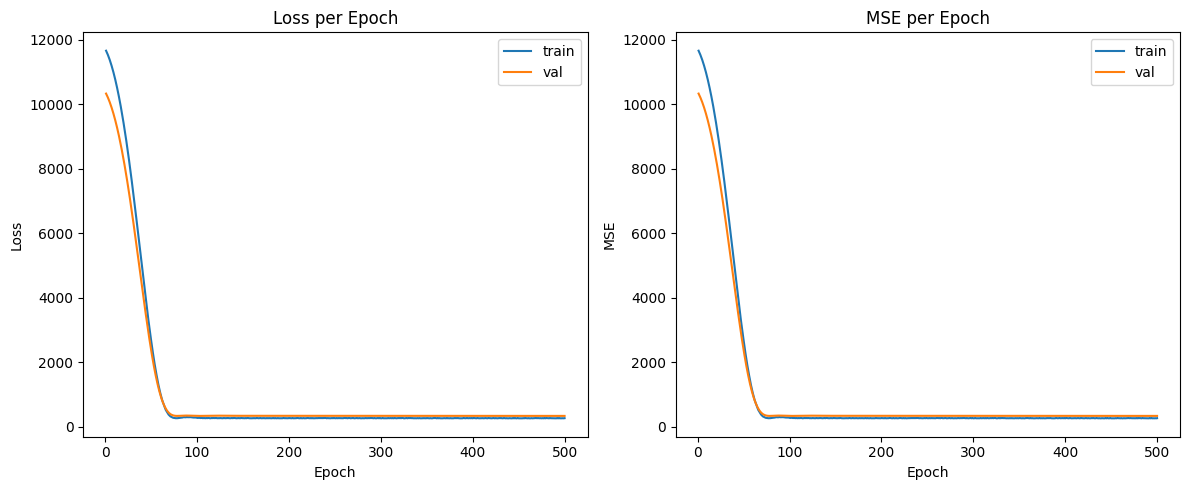

== Final Metrics ==
mse: 336.6529541015625
mae: 9.58407211303711
r2: 0.9303625226020813


: 

In [ ]:
# PCA kullanılmıyor
dataset = TrafficDataset(data_array, X_STEP, Y_STEP)
train_len = int(len(dataset) * 0.8)
val_len = len(dataset) - train_len
train_ds, val_ds = random_split(dataset, [train_len, val_len])
train_loader = DataLoader(train_ds, batch_size=100, shuffle=True)
val_loader = DataLoader(val_ds, batch_size=100)
sensors = dataset.sensors
edges = []
for i in range(sensors - 1):
    edges.append([i, i + 1])
    edges.append([i + 1, i])
edge_index = torch.tensor(edges, dtype=torch.long).t()
predictor = TrafficPredictor('scgnn', sensors, X_STEP, Y_STEP, edge_index=edge_index, pca_model=dataset.pca if False else None)
predictor.train(train_loader, val_loader, epochs=500, save_path=config.PROJECT_ROOT.joinpath('models/scgnn_trafik_nopca.pt'), save_optimizer=True)
predictor.show()